# Exercise One - Descriptive Statistics

In this exercise, we are tasked with summarizing key food cost metrics and trends for economists. We need to provide descriptive statistics for the dataset, including calculating cost of living trends such as the CPI, finding and showing plots of interesting patterns or trends in food costs, and including summary tables per country and product. We will start by loading standard libraries, appending the source code folder to the `PYTHON_PATH`, and setting CSS styling elements for the Jupyter notebooks to ensure our graphs display nicely. Additionally, we will use our utils library to load environment variables from the .env file and other necessary variables from the variables.yml file into our environment for easy access.

Here we import necessary libraries, set up the source path by appending the `src` directory to the `PYTHON_PATH` and then imports utility functions and modules for data handling and environment specification. The code includes a CSS style definition to ensure the output graphs are well-formatted in the Jupyter notebook. Environment variables are loaded from the `.env` and `variables.yml` files to facilitate access to configuration settings. We load the base dataset using this setup.

In [18]:
import os
import sys
import pandas as pd
import numpy as np
import yaml

# setup src path
sys.path.append(os.path.join(os.path.dirname("../"), "src"))

# Load the data
import utils
from utils import cols, theme
import descriptive_statistics
import graphing

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

utils.load_env(path="../.env")
utils.load_variables(path="../variables.yml")

df = pd.read_csv(os.path.join(os.getenv("LOCAL_DATA_PATH"), os.getenv("FOOD_PRICES_FILENAME")))

#### Initial View of Dataset

To get an initial understanding of the dataset, it's common to use the .head() method to view the first few rows. However, this method only shows the beginning of the dataset, which may not be representative. A better approach is to randomly sample or evenly sample rows throughout the dataset to get a more comprehensive view. In this example, we will evenly sample 20 rows from the dataset.

First, the dataset is cleaned using the `utils.clean_data` function to ensure that the headers are cleaned up because there is some white spacing on the ends and other small nusances. Then, we create a list of row indices that are evenly spaced throughout the dataset. By dividing the total number of rows by the sample size, we determine the step size for our sampling. We then append these row indices to a list. Here I will just show twenty lines of the dataset to get an idea of what is going on.

In [12]:
df = utils.clean_data(df)

rows = []
sample = 20
for i in range(0, sample):
    row_num = int(df.shape[0] / sample) * i
    rows.append(row_num)

df.iloc[rows]

,COUNTRY,YEAR,MONTH,FOOD_ITEM,UNIT_OF_MEASUREMENT,AVERAGE_PRICE,CURRENCY,PRICE_IN_USD,AVAILABILITY,QUALITY
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
60,Australia,2018,1,Milk,1 L,1.22,AUD,0.82,1,High
120,Australia,2018,1,Eggs,Carton of 12,3.10,AUD,2.08,1,High
180,Australia,2018,1,Potatoes,1 Kg,3.25,AUD,2.18,1,High
240,Sweden,2018,1,Bread,Loaf,18.61,Kr,1.82,1,High
300,Sweden,2018,1,Milk,1 L,10.18,Kr,1.00,1,High
360,Sweden,2018,1,Eggs,Carton of 12,26.08,Kr,2.56,1,High
420,Sweden,2018,1,Potatoes,1 Kg,11.10,Kr,1.09,1,High
480,Japan,2018,1,Bread,Loaf,186.39,JPY,1.34,1,High
540,Japan,2018,1,Milk,1 L,186.24,JPY,1.34,1,High


In [13]:
descriptive_statistics.price_statistics(df, "South Africa", "Bread", "USD")

,AVERAGE_PRICE,PERC_PRICE_CHANGE_START_YEAR_TO_END_YEAR,MAX_INTER_MONTH_PRICE_CHANGE,MAX_OVERALL_PRICE_CHANGE,PRICE_STANDARD_DEVIATION,PRICE_VARIANCE
YEAR,,,,,,
2018,0.710000,5.797101,0.01,0.04,0.011282,0.000127
2019,0.742500,4.109589,0.01,0.03,0.009653,0.000093
2020,0.770833,2.631579,0.01,0.02,0.007930,0.000063
2021,0.801667,5.128205,0.01,0.04,0.012673,0.000161
2022,0.850000,7.317073,0.01,0.06,0.018586,0.000345


In [14]:
inter_country_price_stats = descriptive_statistics.inter_country_price_statistic_table(df, "Bread", "AVERAGE_PRICE")

# Normalize by the "Average" column
inter_country_price_stats_norm = inter_country_price_stats.div(inter_country_price_stats["Average"], axis=0)

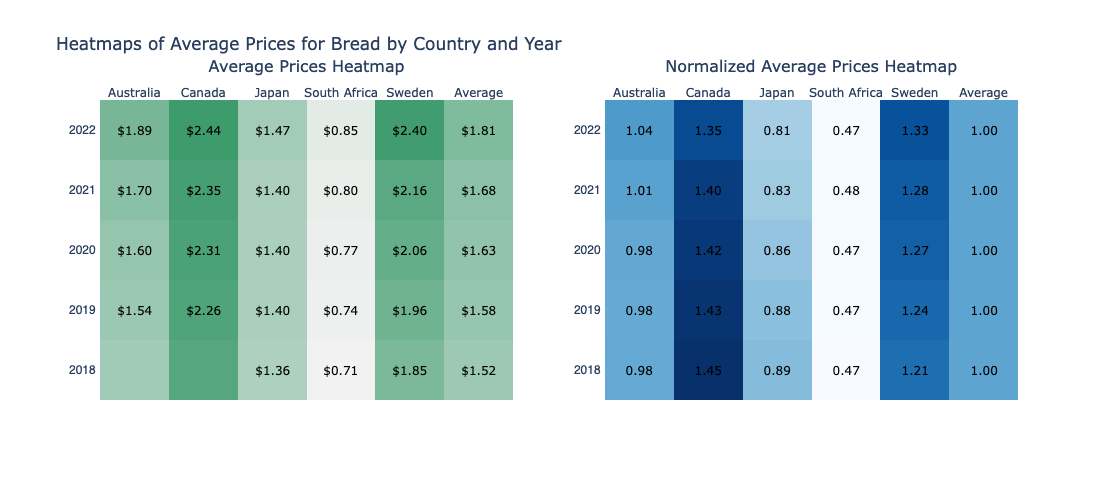

In [15]:
graphing.inter_country_price_heatmaps(inter_country_price_stats, inter_country_price_stats_norm, "Bread", "AVERAGE_PRICE")

In [16]:
inter_country_price_stats = descriptive_statistics.inter_country_price_statistic_table(df, "Milk", "PERC_PRICE_CHANGE_START_YEAR_TO_END_YEAR")

# Normalize by the "Average" column
inter_country_price_stats_norm = inter_country_price_stats.div(inter_country_price_stats["Average"], axis=0)

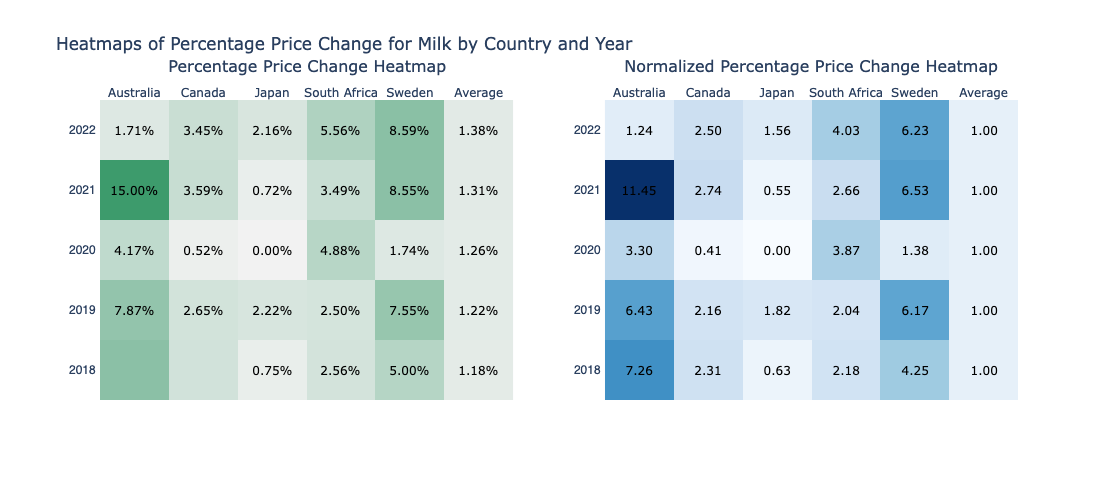

In [17]:
graphing.inter_country_price_heatmaps(inter_country_price_stats, inter_country_price_stats_norm, "Milk", "PERC_PRICE_CHANGE_START_YEAR_TO_END_YEAR")